In [1]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt
from pandas.plotting import lag_plot


In [2]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df.head()

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0


In [3]:
# Paso 2: Filtrar por la empresa sobre la que realizar el modelo

naturgy = df[df['empresa'] == 'Naturgy']

naturgy.shape

(1325, 10)

In [4]:
# Paso 3: Seleccionar las columnas definitivas que utilizaremos

naturgy = naturgy [['date','open','high','low','close','adj close']]

naturgy.shape

(1325, 6)

In [5]:
# Paso 4: Modificar el formato de columna 'date' (format: object ===> datatime)

naturgy['date'] = pd.to_datetime(naturgy['date'], format="%Y-%m-%d")

naturgy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 33414 to 34738
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1325 non-null   datetime64[ns]
 1   open       1325 non-null   float64       
 2   high       1325 non-null   float64       
 3   low        1325 non-null   float64       
 4   close      1325 non-null   float64       
 5   adj close  1325 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 72.5 KB


In [6]:
# Paso 5: Ordenar el DF por fecha

naturgy.sort_values(by='date',ascending= True, inplace=True)

naturgy.head()

,date,open,high,low,close,adj close
34299,2019-01-02,22.010000,22.570000,21.809999,22.530001,16.650408
34074,2019-01-03,22.370001,22.510000,22.180000,22.350000,16.517385
34297,2019-01-04,22.410000,22.620001,22.340000,22.530001,16.650408
34296,2019-01-07,22.500000,22.590000,22.360001,22.590000,16.694756
34295,2019-01-08,22.510000,22.830000,22.510000,22.670000,16.753878


In [7]:
# Paso 6: Filtrar nuevamente para eliminar efecto COVID del análisis (previo a 2021)

# Filtro:

fecha_inicio = '2021-01-01'
fecha_fin = '2024-03-01'

naturgy = naturgy[(naturgy['date'] >= fecha_inicio) & (naturgy['date'] <= fecha_fin)]

# Comprobar si se ha aplicado correctamente

naturgy.shape

(812, 6)

In [8]:
# Paso 7: Añadir al DF fechas obviadas por mercado de valores español (fin de semana y festivos)

# Rango de fechas desde '2021-01-01' a '2024-03-01'

date_range = pd.date_range(start=naturgy['date'].min(), end=naturgy['date'].max(), freq='D')

# Reindexa el DF con el nuevo rango de fechas

naturgy = naturgy.set_index('date').reindex(date_range).reset_index()

# Volver a modificar el nombre de columna 'date'

naturgy = naturgy.rename(columns={'index': 'date'})


In [9]:
# Paso 8: Comprobar que ha introducido la fechas ausentes en el DF original

naturgy.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,19.215000,19.355000,19.065001,19.065001,16.201649
1,2021-01-05,19.020000,19.094999,18.795000,18.930000,16.086926
2,2021-01-06,18.840000,19.415001,18.840000,19.285000,16.388611
3,2021-01-07,19.504999,19.855000,19.235001,19.754999,16.788019
4,2021-01-08,19.940001,20.270000,19.639999,20.270000,17.225672
5,2021-01-09,NaN,NaN,NaN,NaN,NaN
6,2021-01-10,NaN,NaN,NaN,NaN,NaN
7,2021-01-11,20.059999,20.200001,19.745001,20.150000,17.123693
8,2021-01-12,20.270000,20.709999,20.129999,20.510000,17.429626
9,2021-01-13,20.469999,20.680000,20.370001,20.469999,17.395636


In [10]:
# Paso 9: Rellenar valores nulos con el anterior valor de la columna(viernes o previo a festivo)

naturgy = naturgy.fillna(method='ffill')

In [11]:
# Paso 10: Comprobar que se han introducido los valores correctamente


naturgy.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,19.215000,19.355000,19.065001,19.065001,16.201649
1,2021-01-05,19.020000,19.094999,18.795000,18.930000,16.086926
2,2021-01-06,18.840000,19.415001,18.840000,19.285000,16.388611
3,2021-01-07,19.504999,19.855000,19.235001,19.754999,16.788019
4,2021-01-08,19.940001,20.270000,19.639999,20.270000,17.225672
5,2021-01-09,19.940001,20.270000,19.639999,20.270000,17.225672
6,2021-01-10,19.940001,20.270000,19.639999,20.270000,17.225672
7,2021-01-11,20.059999,20.200001,19.745001,20.150000,17.123693
8,2021-01-12,20.270000,20.709999,20.129999,20.510000,17.429626
9,2021-01-13,20.469999,20.680000,20.370001,20.469999,17.395636


In [12]:
# Paso 11: Establecer columna 'date' como índice para modelo

naturgy = naturgy.set_index('date')

naturgy.head(10)

,open,high,low,close,adj close
date,,,,,
2021-01-04,19.215000,19.355000,19.065001,19.065001,16.201649
2021-01-05,19.020000,19.094999,18.795000,18.930000,16.086926
2021-01-06,18.840000,19.415001,18.840000,19.285000,16.388611
2021-01-07,19.504999,19.855000,19.235001,19.754999,16.788019
2021-01-08,19.940001,20.270000,19.639999,20.270000,17.225672
2021-01-09,19.940001,20.270000,19.639999,20.270000,17.225672
2021-01-10,19.940001,20.270000,19.639999,20.270000,17.225672
2021-01-11,20.059999,20.200001,19.745001,20.150000,17.123693
2021-01-12,20.270000,20.709999,20.129999,20.510000,17.429626


In [13]:
# Paso 12: Establecer siguiente criterio para que el modelo AR funcione

naturgy.index = pd.DatetimeIndex(naturgy.index).to_period('d')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

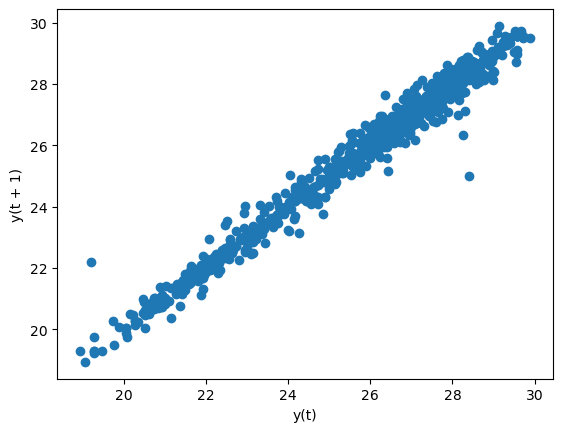

In [14]:
# Paso 13: Comprobar linealidad de la variable y = 'close'

lag_plot(naturgy.close)

In [15]:
# Paso 14: Importar modelo de AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [16]:
# Paso 15: Realizar el split en el DF del train y el test

train, test = naturgy.close[:-10], naturgy.close[-10:]

train.shape, test.shape

((1143,), (10,))

In [17]:
# Paso 16: Entrenar el modelo de AR

modelo = AR(train, lags=1).fit()

In [18]:
# Paso 17: Realizar predicción con el entrenamiento

pred = modelo.predict(len(train), len(naturgy.close)-1)

# Check sobre los valores de la predicción

pred

2024-02-21    23.042961
2024-02-22    23.065719
2024-02-23    23.088276
2024-02-24    23.110633
2024-02-25    23.132793
2024-02-26    23.154758
2024-02-27    23.176528
2024-02-28    23.198106
2024-02-29    23.219494
2024-03-01    23.240692
Freq: D, dtype: float64

In [19]:
# Paso 18: Chequear coincidencia entre test y pred

test

date
2024-02-21    23.160000
2024-02-22    23.100000
2024-02-23    23.139999
2024-02-24    23.139999
2024-02-25    23.139999
2024-02-26    22.480000
2024-02-27    22.320000
2024-02-28    21.920000
2024-02-29    21.879999
2024-03-01    21.100000
Freq: D, Name: close, dtype: float64

In [20]:
# Paso 19: Calcular el error de la predicción sobre la realidad

error = (pred - test).abs().sum()/len(pred)  

error

0.6529193383099482

In [21]:
# Paso 20: Generar un DF sobre la comparativa en realidad, predicción y error

res=pd.DataFrame({'real': test, 'pred': pred, 'error': pred - test})

res

,real,pred,error
2024-02-21,23.160000,23.042961,-0.117039
2024-02-22,23.100000,23.065719,-0.034281
2024-02-23,23.139999,23.088276,-0.051723
2024-02-24,23.139999,23.110633,-0.029366
2024-02-25,23.139999,23.132793,-0.007206
2024-02-26,22.480000,23.154758,0.674758
2024-02-27,22.320000,23.176528,0.856528
2024-02-28,21.920000,23.198106,1.278106
2024-02-29,21.879999,23.219494,1.339495
2024-03-01,21.100000,23.240692,2.140692
